Este notebook tiene como objetivo realizar un análisis exploratorio de la base de datos "Musicsmaller" de Spotify, que contiene información sobre playlists y canciones. Se utilizarán consultas SQL para extraer datos relevantes y se crearán visualizaciones para comprender mejor las características de las playlists y las canciones.

Se preservaron algunas inconsistencias, errores y demás para comprobar el trabajo artesanal y luchado.


Librerías:

In [6]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# listo la descarga de librerias pa la entrega

Conexión a la base de datos

In [7]:
# Cargar la base de datos 
conn = sqlite3.connect(r"C:\Users\Danie\OneDrive\Documents\ANTR-2029-ANTRCOMP\Musicsmaller.db")




Consultas SQL

In [9]:
%load_ext sql

In [16]:
# listar las tablas de la base de datos
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)



,name
0,slice_time
1,playlists
2,song


In [20]:
query = """ 
SELECT * FROM Playlists;
"""

In [21]:
pd.read_sql_query(query,conn)

,slice,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,0-999,0,1493424000,52,47,1,6,11532414,37
1,0-999,1,1506556800,39,23,1,5,11656470,21
2,0-999,2,1505692800,64,51,1,18,14039958,31
3,0-999,3,1501027200,126,107,1,4,28926058,86
4,0-999,4,1401667200,17,16,2,7,4335282,16
...,...,...,...,...,...,...,...,...,...
7995,10000-10999,10995,1508544000,57,6,1,3,12384066,3
7996,10000-10999,10996,1485475200,130,121,1,43,29204524,109
7997,10000-10999,10997,1477526400,63,27,1,10,14965824,22
7998,10000-10999,10998,1442534400,38,20,1,3,8052086,14


In [17]:
# listar las tablas de la base de datos
query = "SELECT * FROM playlists"
datos = pd.read_sql_query(query, conn)

# Mostrar cómo queda el archivo
print(datos.head())

   slice  pid  modified_at  num_tracks  num_albums  num_followers  num_edits  \
0  0-999    0   1493424000          52          47              1          6   
1  0-999    1   1506556800          39          23              1          5   
2  0-999    2   1505692800          64          51              1         18   
3  0-999    3   1501027200         126         107              1          4   
4  0-999    4   1401667200          17          16              2          7   

   duration_ms  num_artists  
0     11532414           37  
1     11656470           21  
2     14039958           31  
3     28926058           86  
4      4335282           16  


In [21]:
# listar las tablas de la base de datos
query = "SELECT * FROM song"
datoss = pd.read_sql_query(query, conn)

# Mostrar cómo queda el archivo
print(datoss.head())

                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:229SqGbacrLSBfb9XfJczF    6    1   
2  spotify:track:0orNm6qQT2B5WFi0l7l3PV    6    2   
3  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
4  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   

                             artist_name  \
0           Creedence Clearwater Revival   
1                                 STRFKR   
2                                    311   
3  Nathaniel Rateliff & The Night Sweats   
4                                Toadies   

                              artist_uri              track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd    I Put A Spell On You   
1  spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU           Bury Us Alive   
2  spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K  Jackolantern's Weather   
3  spotify:artist:02seUFsFQP7TH4hLrTj77o                  S.O.B.   
4  spotify:artist:2QMMktUMtwMSwUZATX1cRO          Possum Kingdom   

       

In [25]:
### Cargar la extensión de sql
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [19]:
%sql sqlite:///Musicsmaller.db

se averigua por el número total de playlist

In [56]:
%%sql
SELECT COUNT(*)
AS num_playlists
FROM playlists; 

 * sqlite:///Musicsmaller.db
Done.


num_playlists
8000


Pregunta 1: 
Cuál es la distribución del número de canciones por playlist

In [33]:
%%sql
SELECT num_tracks, COUNT(*) AS num_playlists
FROM playlists
GROUP BY num_tracks;

 * sqlite:///Musicsmaller.db
Done.


num_tracks,num_playlists
5,42
6,43
7,56
8,54
9,59
10,88
11,81
12,99
13,86
14,128


también y mucho mejor representable en una gráfica:

<Axes: xlabel='num_tracks', ylabel='Count'>

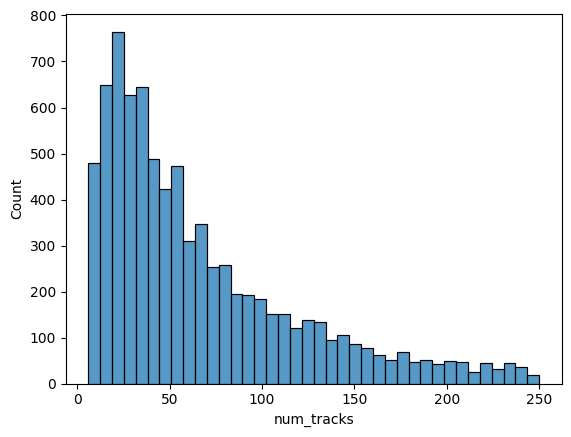

In [44]:
sns.histplot(data=tabla_1, x="num_tracks")

En definitiva, hay mayor cantidad de playlist con una media de canciones en 50 aproximadamente


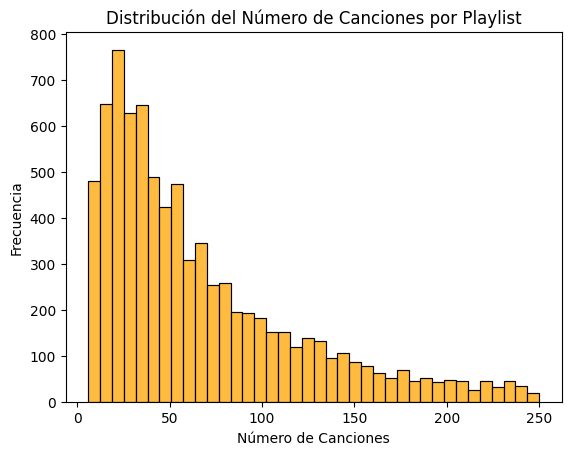

In [42]:
sns.histplot(data=tabla_1,x="num_tracks", color="orange")
plt.title("Distribución del Número de Canciones por Playlist")
plt.xlabel('Número de Canciones')
plt.ylabel('Frecuencia')
plt.show()

In [51]:
# Cargar la base de datos 
conn = sqlite3.connect(r"C:\Users\Danie\OneDrive\Documents\ANTR-2029-ANTRCOMP\Musicsmaller.db")


In [52]:
# listar las tablas de la base de datos
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,slice_time
1,playlists
2,song


In [58]:
# listar las tablas de la base de datos
query = "SELECT * FROM playlists"
datos = pd.read_sql_query(query, conn)

# Mostrar cómo queda el archivo
print(datos.head())

   slice  pid  modified_at  num_tracks  num_albums  num_followers  num_edits  \
0  0-999    0   1493424000          52          47              1          6   
1  0-999    1   1506556800          39          23              1          5   
2  0-999    2   1505692800          64          51              1         18   
3  0-999    3   1501027200         126         107              1          4   
4  0-999    4   1401667200          17          16              2          7   

   duration_ms  num_artists  
0     11532414           37  
1     11656470           21  
2     14039958           31  
3     28926058           86  
4      4335282           16  


In [59]:
# listar las tablas de la base de datos
query = "SELECT * FROM song"
datoss = pd.read_sql_query(query, conn)

# Mostrar cómo queda el archivo
print(datoss.head())

                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:229SqGbacrLSBfb9XfJczF    6    1   
2  spotify:track:0orNm6qQT2B5WFi0l7l3PV    6    2   
3  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
4  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   

                             artist_name  \
0           Creedence Clearwater Revival   
1                                 STRFKR   
2                                    311   
3  Nathaniel Rateliff & The Night Sweats   
4                                Toadies   

                              artist_uri              track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd    I Put A Spell On You   
1  spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU           Bury Us Alive   
2  spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K  Jackolantern's Weather   
3  spotify:artist:02seUFsFQP7TH4hLrTj77o                  S.O.B.   
4  spotify:artist:2QMMktUMtwMSwUZATX1cRO          Possum Kingdom   

       

Decido preservar errores en entrega a fin de esclarecer por qué si todo esta bien redactado ocurre eso.


In [128]:
%%sql
SELECT COUNT(*)
AS num_followers
FROM playlists; 

 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) no such table: playlists
[SQL: SELECT COUNT(*)
AS num_followers
FROM playlists;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [68]:
%%sql
SELECT artist_name, COUNT(*) AS num_playlists
FROM song
JOIN playlists ON song.pid = playlist.pid
GROUP BY artist_name
ORDER BY num_playlists DESC
LIMIT 10;

 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) no such table: song
[SQL: SELECT artist_name, COUNT(*) AS num_playlists
FROM song
JOIN playlists ON song.pid = playlist.pid
GROUP BY artist_name
ORDER BY num_playlists DESC
LIMIT 10;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [69]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,slice_time
1,playlists
2,song


In [71]:
%%sql
SELECT AVG(duration_ms) AS avg_duration_ms
FROM playlists;

 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) no such table: playlists
[SQL: SELECT AVG(duration_ms) AS avg_duration_ms
FROM playlists;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [72]:
query = """
SELECT *
FROM playlists
ORDER BY modified_at 
LIMIT 20;
"""

In [73]:
datos = pd.read_sql_query(query, conn)
print(datos.head())

         slice    pid  modified_at  num_tracks  num_albums  num_followers  \
0  10000-10999  10845   1310601600           7           7              3   
1    9000-9999   9328   1318204800          39          28              1   
2        0-999    295   1322611200          47          35              2   
3  10000-10999  10568   1323475200         155          62              1   
4    8000-8999   8714   1327017600          39          33              2   

   num_edits  duration_ms  num_artists  
0          2      1312185            7  
1          2      9660432           17  
2          3      9019237           38  
3          3     30222412           47  
4          2      9039560           31  


In [118]:
g = sns.regplot(x="pid", y="modified_at", data=datos);
sns.set_theme(style="whitegrid", palette="viridis")


# Ajustar el layout
plt.xticks(rotation=90)
g.set_xlabel("Playlists", fontsize=12)
g.set_ylabel("fecha de modificación", fontsize=10)

# Agregar un título 
g.set_title("Top 20 playlists más recientes", fontsize=16, y=1.05)



# Mostrar el gráfico
plt.show()

KeyError: 'modified_at'

In [81]:
%%sql 
SELECT *
FROM playlists
LIMIT 10

 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) no such table: playlists
[SQL: SELECT *
FROM playlists
LIMIT 10]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


queda en evidencia el error a un codigo simple como este cuando todo esta bien digitado, diciendo que no hay un tabla con ese nombre

In [86]:
datos = pd.read_sql_query(query, conn)
print(datos.head())

                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
2  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   
3  spotify:track:6y20BV5L33R8YXM0YuI38N    6    5   
4  spotify:track:6xy6jNeNTYwjnKTDzMyHw2    6    6   

                             artist_name  \
0           Creedence Clearwater Revival   
1  Nathaniel Rateliff & The Night Sweats   
2                                Toadies   
3                Queens of the Stone Age   
4                        The Cranberries   

                              artist_uri            track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd  I Put A Spell On You   
1  spotify:artist:02seUFsFQP7TH4hLrTj77o                S.O.B.   
2  spotify:artist:2QMMktUMtwMSwUZATX1cRO        Possum Kingdom   
3  spotify:artist:4pejUc4iciQfgdX6OKulQn          No One Knows   
4  spotify:artist:7t0rwkOPGlDPEhaOcVtOt9                Zombie   

                   

In [98]:
query = "SELECT * FROM playlists"
playlists = pd.read_sql_query(query,conn)
query = "SELECT * FROM song"
song = pd.read_sql_query(query,conn)

In [94]:
song.head()

,track_uri,pid,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name
0,spotify:track:4SDywo3ykB2PEthjXvo1UP,6,0,Creedence Clearwater Revival,spotify:artist:3IYUhFvPQItj6xySrBmZkd,I Put A Spell On You,spotify:album:7oIftk0P8cViwNpNEdCYl2,271786,Creedence Clearwater Revival
1,spotify:track:229SqGbacrLSBfb9XfJczF,6,1,STRFKR,spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU,Bury Us Alive,spotify:album:5pfqk4oFycMVynOD8S2Cqs,190360,Reptilians
2,spotify:track:0orNm6qQT2B5WFi0l7l3PV,6,2,311,spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K,Jackolantern's Weather,spotify:album:6VIeIM5tetuv7FrYxISffU,204160,311
3,spotify:track:1hWQvA6oGVJ2mAVsZ59AaV,6,3,Nathaniel Rateliff & The Night Sweats,spotify:artist:02seUFsFQP7TH4hLrTj77o,S.O.B.,spotify:album:2UCyiayMoJOwBilPLQPQvK,247612,Nathaniel Rateliff & The Night Sweats
4,spotify:track:56SkdBKyR2zOkjk6wVFI9s,6,4,Toadies,spotify:artist:2QMMktUMtwMSwUZATX1cRO,Possum Kingdom,spotify:album:7tFTqVGHceSlXOaz8IylBN,309573,Rubberneck


PREGUNTA 2: ¿Existe una relación entre la duración total de una lista de reproducción y el número de canciones que contiene?

Sí la hay.

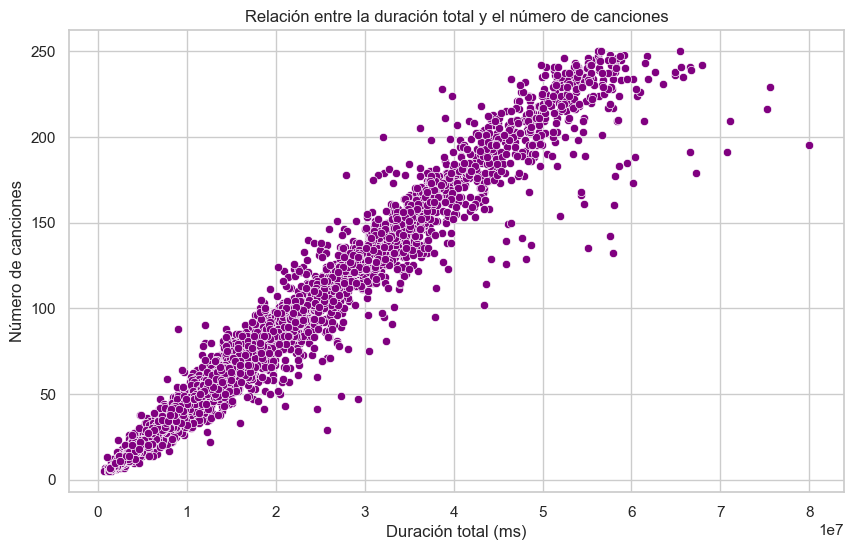

In [115]:
#se configura tabla
plt.figure(figsize=(10, 6))
sns.scatterplot(playlists, x="duration_ms", y="num_tracks", color="purple")

# se añade titulo y variables (dios mio al fin di con el chiste)
plt.title("Relación entre la duración total y el número de canciones")
plt.xlabel("Duración total (ms)")
plt.ylabel("Número de canciones")
plt.grid(True)

# evidenciar
plt.show()

Diagrama de violín para comparar la distribución de la diversidad de artistas en categorías de cantidad de álbumes:

In [108]:

playlists["album_count_category"] = pd.qcut(playlists["num_albums"], 4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])

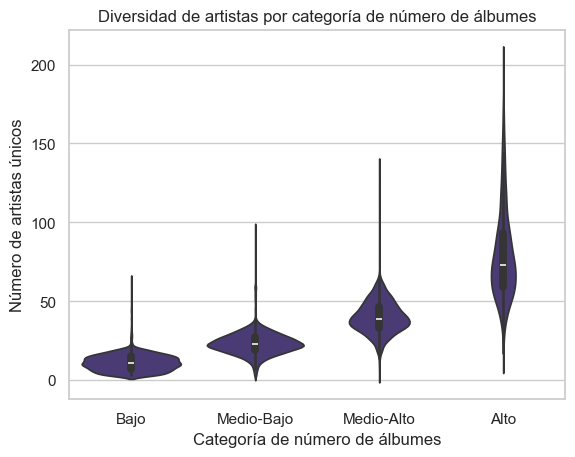

In [114]:
sns.violinplot(x="album_count_category", y="num_artists", data=playlists)
plt.title("Diversidad de artistas por categoría de número de álbumes")
plt.xlabel("Categoría de número de álbumes")
plt.ylabel("Número de artistas únicos")
plt.show()

Este es un hallazgo lógico, igual esforzado llegar a el por la gráfica: Las distribuciones de la diversidad de artistas en las diferentes categorías tienen formas similares, todas con medianas (líneas centrales) que aumentan de izquierda a derecha. Esto sugiere que, en general, las listas de reproducción con más álbumes tienden a tener una mayor diversidad de artistas.

Pregunta 4: ¿Cuál es el número promedio de artistas por playlist?

Después de varios intentos se da con la forma adecuada de agrupar los datos

In [126]:
#selecciono datos para agrupar
query2 = """
SELECT pid, AVG(num_artists) AS num_artists
FROM playlists
GROUP BY pid
ORDER BY AVG(num_followers) DESC
LIMIT 10
"""
df_grouped = pd.read_sql_query(query2, conn)

In [124]:
df_grouped = pd.read_sql_query(query2, conn)

C:\Users\Danie\AppData\Local\Temp\ipykernel_10532\1988443771.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='num_artists', data=df_grouped, color='blue', shade=True)


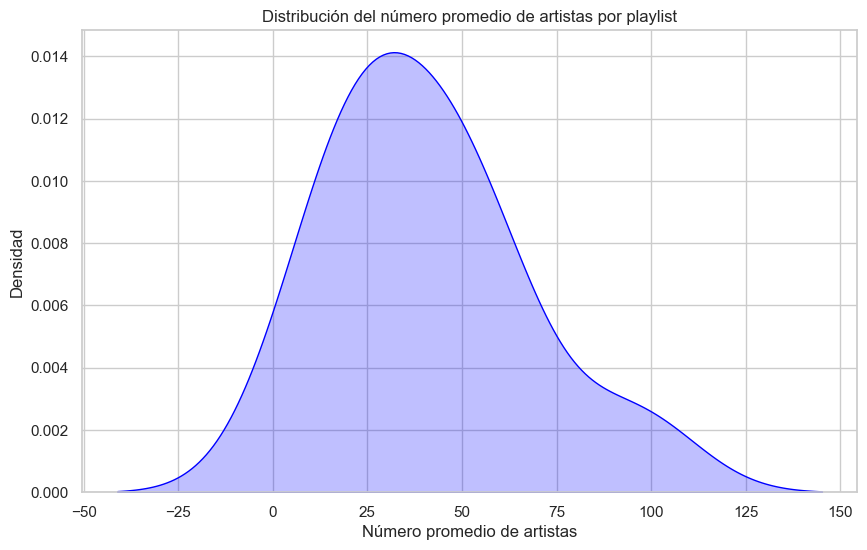

In [127]:
# Creo figura y defino tamaño
fig, ax = plt.subplots(figsize=(10, 6))

# Creo diagrama de densidad con seaborn
sns.kdeplot(x='num_artists', data=df_grouped, color='blue', shade=True)

# titulo y demás
plt.title('Distribución del número promedio de artistas por playlist')
plt.xlabel('Número promedio de artistas')
plt.ylabel('Densidad')

# Mueche el gráfico
plt.show()

El número promedio de artistas en las playlist es de 40, este si que es un hallazgo interesante.

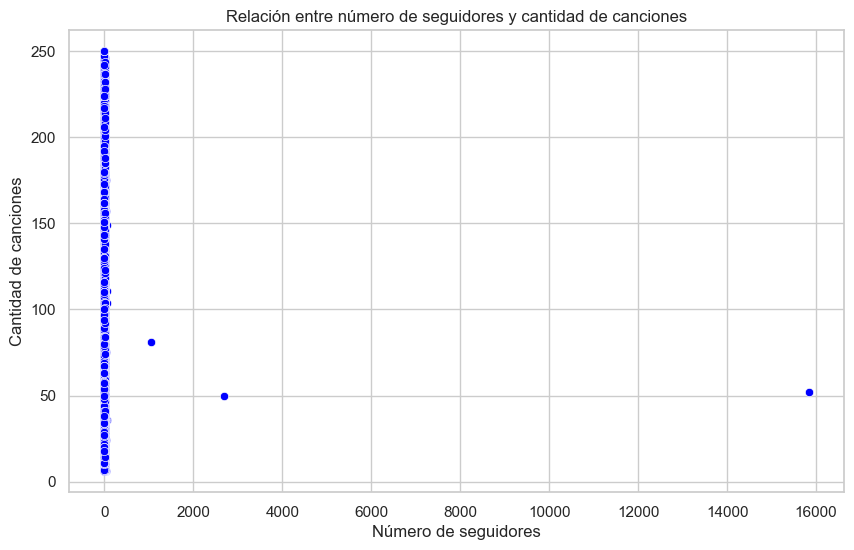

In [134]:
# Crear figura y establecer tamaño
fig, ax = plt.subplots(figsize=(10, 6))

# Crear diagrama de dispersión con seaborn
sns.scatterplot(x='num_followers', y='num_tracks', data=tabla_1, color='blue')

# Agregar título, etiquetas de eje y leyenda
plt.title('Relación entre número de seguidores y cantidad de canciones')
plt.xlabel('Número de seguidores')
plt.ylabel('Cantidad de canciones')

# Mostrar el gráfico
plt.show()


La tabla no brinda información concluyente o importante


In [161]:
%%sql
SELECT artist_name, COUNT(*) AS artist_counts
FROM song
JOIN playlists ON song.playlist_id = playlists.playlist_id
GROUP BY artist_name
ORDER BY artist_counts DESC

 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) no such table: song
[SQL: SELECT artist_name, COUNT(*) AS artist_counts
FROM song
JOIN playlists ON song.playlist_id = playlists.playlist_id
GROUP BY artist_name
ORDER BY artist_counts DESC]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [165]:
%%sql
CREATE TABLE song (
  artist_name VARCHAR(255) NOT NULL,
  song_name VARCHAR(255) NOT NULL,
  playlist_id INTEGER NOT NULL,
   -- Replace song_id with the actual primary key if one exists
);

 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) near ")": syntax error
[SQL: CREATE TABLE song (
  artist_name VARCHAR(255) NOT NULL,
  song_name VARCHAR(255) NOT NULL,
  playlist_id INTEGER NOT NULL,
   -- Replace song_id with the actual primary key if one exists
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [175]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
connection = sqlite3.connect('Spotify.db')

query = "SELECT * FROM playlists"
playlists = pd.read_sql_query(query, conn)

query = "SELECT * FROM song"
song = pd.read_sql_query(query, conn)

In [176]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,slice_time
1,playlists
2,song


In [185]:
%%sql
SELECT artist_name
FROM song


 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) no such table: song
[SQL: SELECT artist_name
FROM song]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [187]:
def cargar_datos_playlists():
    connection = sqlite3.connect('Musicsmaller.db')
    query = "SELECT artist_name AS 
    datos_playlists = pd.read_sql_query(query, connection)
    connection.close()
    return datos_playlists

In [201]:
%%sql
connection = sqlite3.connect('C:\Users\Danie\OneDrive\Documents\ANTR-2029-ANTRCOMP\Musicsmaller.db')

 * sqlite:///Musicsmaller.db
(sqlite3.OperationalError) near "connection": syntax error
[SQL: connection = sqlite3.connect('C:\Users\Danie\OneDrive\Documents\ANTR-2029-ANTRCOMP\Musicsmaller.db')]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [202]:
%%sql
SELECT name
FROM sqlite_master
WHERE type='table';

 * sqlite:///Musicsmaller.db
Done.


name


Algo estoy haciendo mal con las conexiones


In [203]:
# Cargar la base de datos 
conn = sqlite3.connect(r"C:\Users\Danie\OneDrive\Documents\ANTR-2029-ANTRCOMP\Musicsmaller.db")

In [209]:
query= """
SELECT 
    artist_name, COUNT(pid)
FROM 
    song
GROUP BY 
    artist_name
ORDER BY 
    COUNT(pid) DESC
LIMIT 5;

"""

In [225]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name


Seguí de largo intentando gestionar esto y no darme por vencido. Aquí esta lo mejor que pude dar de mi
